In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_continuous_absolute
%store -r Y_relative_footsteps_continuous_absolute
print(X_relative_footsteps_continuous_absolute.shape)
print(Y_relative_footsteps_continuous_absolute.shape)

(2061, 32)
(2061, 4)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FL/RR are swinging
idxs = np.where(X_relative_footsteps_continuous_absolute[:, 24] == 1)[0]
X_relative_footsteps_continuous_absolute_RR_swing = X_relative_footsteps_continuous_absolute[idxs]
Y_relative_footsteps_continuous_absolute_RR_swing = Y_relative_footsteps_continuous_absolute[idxs]

In [8]:
print("Percentage of footstep where FL and RR are swinging: ", len(idxs)/len(X_relative_footsteps_continuous_absolute) * 100)

Percentage of footstep where FL and RR are swinging:  50.41242115477923


## Predict RR foot -> x

### Linear Regression

In [10]:
# Input
X = np.hstack((X_relative_footsteps_continuous_absolute_RR_swing[:, :3], # motion command
               X_relative_footsteps_continuous_absolute_RR_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_absolute_RR_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_absolute_RR_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_absolute_RR_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_absolute_RR_swing[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rr_relative_swinging_x = LinearRegression()

# Fit the model
model_rr_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9960020032905068
RMSE:  0.0027356557842915397
The lowest error is:  8.439939056248402e-07
The highest error is:  0.016041034510575564
The avg. error is:  0.0012934879312929495


In [11]:
model_rr_relative_swinging_x.coef_

array([[ 2.08919561e-01, -5.55111512e-17, -1.11022302e-16,
        -2.85005148e-02,  1.27957549e-01, -1.15864743e-01,
        -8.49513737e-01,  1.73992902e-01,  1.83607503e-02,
        -3.11669306e-01,  8.95670191e-02]])

In [12]:
model_rr_relative_swinging_x.intercept_

array([-0.16012189])

Text(0, 0.5, 'Predictions')

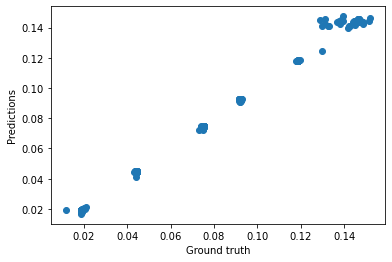

In [13]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [14]:
#%store model_rr_relative_swinging_x

In [15]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [16]:
# Save model
#joblib.dump(model_rr_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_x.sav")

### Predict RR foot -> y

In [17]:
# Input
X = np.hstack((X_relative_footsteps_continuous_absolute_RR_swing[:, :3], # motion command
               X_relative_footsteps_continuous_absolute_RR_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_absolute_RR_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_absolute_RR_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_absolute_RR_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_absolute_RR_swing[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rr_relative_swinging_y = LinearRegression()

# Fit the model
model_rr_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.35892581861402595
RMSE:  0.001662407292138909
The lowest error is:  7.218838673606065e-06
The highest error is:  0.00889382794826149
The avg. error is:  0.0008056747608440512


In [18]:
model_rr_relative_swinging_y.coef_

array([[ 2.93355224e-02,  2.77555756e-17,  1.38777878e-16,
         1.00939821e-01,  1.65775938e-01,  1.86654720e-01,
         1.01897793e-02, -3.00482016e-01,  1.53367361e-01,
         5.64245158e-02, -4.60117806e-01]])

In [19]:
model_rr_relative_swinging_y.intercept_

array([-0.2571808])

Text(0, 0.5, 'Predictions')

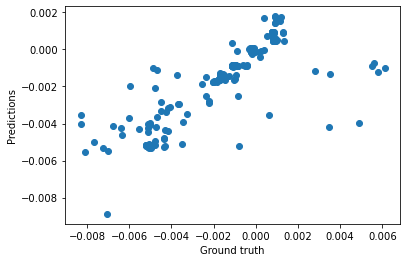

In [20]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [21]:
#%store model_rr_relative_swinging_y

In [23]:
#for idx, prediction in enumerate(predictions):
#    print(f'Input: {X_test[idx]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [24]:
# Save model
#joblib.dump(model_rr_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_y.sav")